# Analytic Comparison
This notebook is a test to ensure the results from the numerical DLS model converge to the analytical results.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from fusiondls.Analytic_DLS import CfInt

In [2]:
from fusiondls import LfuncN, run_dls, file_read

eqb = file_read("eqb_store_lores.pkl")
profiles = eqb["V10"]["ou"]

In [3]:
# set switches
radios = {
    "ionisation": False,  # WIP - do not use. in development
    "upstreamGrid": True,  # SET TRUE if including domain above xpoint. if true, source of divertor heat flux comes from radial transport upstream, and Tu is at the midplane. If false, heat flux simply enters at the x point as qi, and Tu is located at the x point.
    "fluxlim": False,  # WIP - do not use. if true, turns on a flux limiter with coefficient alpha
}

# set general run parameters
constants = {
    "gamma_sheath": 7,  # sheath transmittion coefficient for virtual target. Choice does not matter if Tt is low
    "Tt": 1,  # requested virtual target temp for calculating heat flux at detachment front. Aim for low (sub 1eV) Tt
    "qpllu0": 5e9,  # heat flux density at the x point
    "nu": 1e20,  # Upstream density (if constant)
    "nu0": 1e20,  # Upstream density (if constant)
    "cz0": 0.02,  # Impurity fraction (if constant)
    "Lfunc": LfuncN,  # impurity cooling function. More are available in AnalyticCoolingCurves.py
    "alpha": 1000,  # WIP - do not use. flux limiting alpha. Only matters if fluxlim is true
}

## Run the Numerical DLS and compare to analytical


Solving...0.00...7.52...15.05...Complete in 1.3 seconds
Solving...0.00...7.52...15.05...Complete in 1.5 seconds
Solving...0.00...7.52...15.05...Complete in 1.0 seconds
Solving...0.00...7.52...15.05...Complete in 1.1 seconds


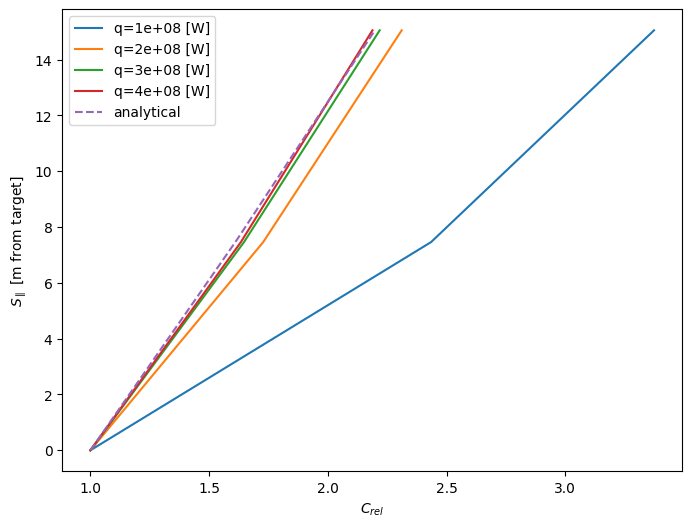

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# Solve at these parallel positions
SparRange = np.linspace(0, profiles["S"][profiles["Xpoint"] - 1], 3)


endresults = []

for heat_flux in np.linspace(1e8, 4e8, 4):
    constants["qpllu0"] = heat_flux

    results = run_dls(
        constants,
        radios,
        profiles,
        SparRange,
        control_variable="density",
        Ttol=1e-3,
        Ctol=1e-3,
    )
    ax.plot(
        results["cvar"] / results["cvar"][0],
        results["Splot"],
        label=f"q={heat_flux:g} [W]",
    )
    endresults.append(results["cvar"][-1] / results["cvar"][0])


resultsAnalytical = [
    CfInt(
        profiles["S"],
        profiles["Btot"],
        profiles["Sx"],
        np.max(profiles["S"]),
        sh=s,
        kappa1=2500,
    )
    for s in SparRange
]

ax.plot(
    resultsAnalytical / resultsAnalytical[0],
    SparRange,
    label="analytical",
    linestyle="--",
)
ax.set_xlabel(r"$C_{rel}$")
ax.set_ylabel(r"$S_{\parallel}$ [m from target]")

ax.legend()
plt.show()

# Results

The percentage error for the detachment window ($C_{rel}$ at the end of the scan) for these results should be:

34.84580096  4.88695024  0.9128461  -0.46825693

converging to the result

2.198303859484034


In [5]:
print(
    "percentage error is",
    100 * (endresults - resultsAnalytical[-1] / resultsAnalytical[0]) / endresults,
)

percentage error is [34.84580096  4.88695024  0.9128461  -0.46825693]
